In [21]:
from skimage.io import imread, imshow, imsave
from skimage.morphology import  disk, closing
from skimage.filters.rank import minimum, maximum, autolevel,enhance_contrast

import matplotlib.pyplot as plt
import numpy as np

from skimage.feature import canny 
from skimage.filters.rank import median, mean


plt.style.use('ggplot')
plt.gray()

def display_image(image):
    plt.figure()
    plt.imshow(image.astype('uint8'))
    plt.show()
    
def display_plot(image):
    plt.figure()
    plt.plot(image)
    plt.show()

def get_histogram(image):
    histogram, bins = np.histogram(image.flatten(), range(256))
    return histogram/np.sum(histogram)

def apply_gamma_correction(image,value): 
    gamma = value
    lut = np.power(np.arange(0,256), gamma)*np.power(255, 1-gamma)
    return lut[image]

def apply_histogram_equalization(histogram, image):
    histogram = np.append(np.array(0),np.cumsum(histogram))
    lut = (histogram*255).astype('uint8')
    image = image.astype('uint8')
    return lut[image]
    
def apply_threshold(value, image):
    new_image = image.copy()
    mask2 = new_image<value
    new_image[mask2==False]=255
    return new_image

def apply_local_contrast_enhancement(size, image):
    struct_element= np.ones((size,size,size))
    enhanced_image =  enhance_contrast(image,struct_element)
    return enhanced_image

def apply_local_minimum(size, image):
    struct_element= np.ones((size,size,size))
    local_min =  minimum(image,struct_element)
    return local_min

<Figure size 432x288 with 0 Axes>

In [22]:
# image from https://www.researchgate.net/figure/a-Segmented-nucleus-of-the-TVT-cell-in-grayscale-b-The-same-nucleus-after-the-ROI_fig4_2931287
image = imread('cell.png')
histogram = get_histogram(image)

equalized_image = apply_histogram_equalization(histogram, image)
locally_enhanced_image= apply_local_contrast_enhancement(10, equalized_image)

 

cells = equalized_image.copy()
cells[locally_enhanced_image<50]=0

histogram = get_histogram(locally_enhanced_image)

Text(0.5, 1.0, 'Detected cells')

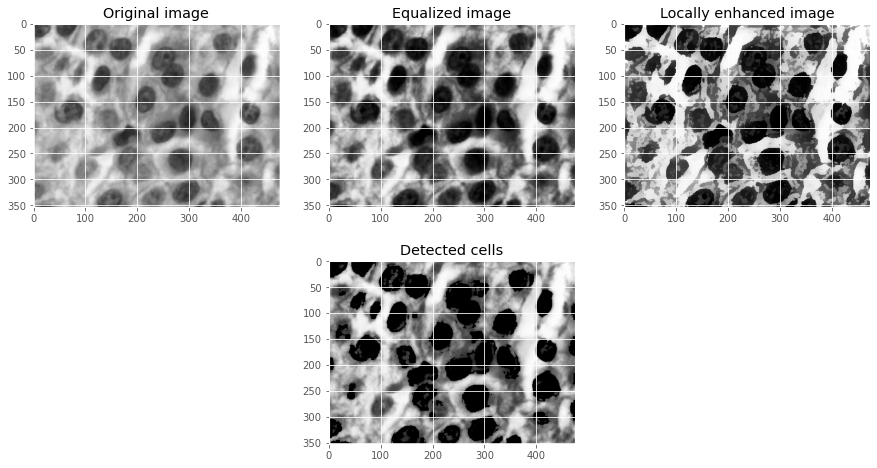

In [23]:
plt.figure(figsize=[15,8])
plt.subplot(2,3,1)
plt.imshow(image)
plt.title('Original image')

plt.subplot(2,3,2)
plt.imshow(equalized_image)
plt.title('Equalized image')

plt.subplot(2,3,3)
plt.imshow(locally_enhanced_image)
plt.title('Locally enhanced image')

plt.subplot(2,3,5)
plt.imshow(cells)
plt.title('Detected cells')

In [26]:
image = imread('dh_phase.png')
original_image = image.copy()

image[0:500, 100:500] =median(image[0:500, 100:500], disk(5))
smoothed_image = image.copy() 

image[0:500, 100:500] =enhance_contrast(image[0:500, 100:500], disk(5))
enhanced_image = image.copy()

    
image[0:500, 100:500] = maximum(image[0:500, 100:500], disk(5))
brigthened_image = image.copy() 

# Apply the canny edge on both the processed image and the original one 

border1 =closing(canny(image, sigma=4), disk(10))
border2 =canny(original_image, sigma=4)

Text(0.5, 1.0, 'canny edge on original image')

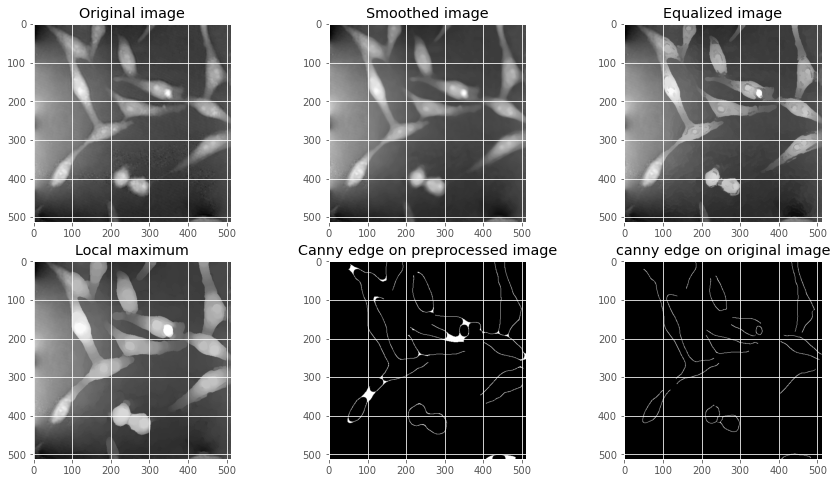

In [29]:
plt.figure(figsize=[15,8])
plt.subplot(2,3,1)
plt.imshow(original_image)
plt.title('Original image')


plt.subplot(2,3,2)
plt.imshow(smoothed_image)
plt.title('Smoothed image')

plt.subplot(2,3,3)
plt.imshow(enhanced_image)
plt.title('Equalized image')


plt.subplot(2,3,4)
plt.imshow(brigthened_image)
plt.title('Local maximum')

plt.subplot(2,3,5)
plt.imshow(border1)
plt.title('Canny edge on preprocessed image')

plt.subplot(2,3,6)
plt.imshow(border2)
plt.title('canny edge on original image')